# Goal:

Create a writter agent that attemps to write reports for the user

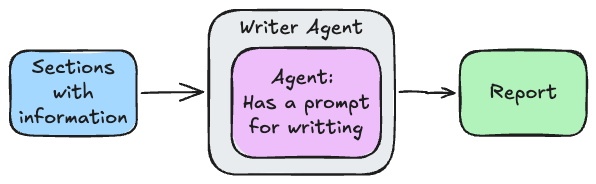

# Set-up LLM

We define the LLM

In [1]:
from pydantic_settings import BaseSettings
import os
class Settings(BaseSettings):
    GOOGLE_API_KEY: str
    MODEL_NAME: str = "google-gla:gemini-2.5-flash"
    CONTEXT7_API_KEY: str
    class Config:
        #ignore extra fields
        extra = "ignore"
        env_file = ".env"

settings = Settings()
os.environ["GOOGLE_API_KEY"] = settings.GOOGLE_API_KEY

# Outline from our Planner Agent and Instructions from Researcher Agent

In [2]:
outline = """
# Report Outline: Creating Agents with Pydantic-AI

## 1. Summary
*   Brief overview of AI agents and the critical role of data validation.
*   Introduction to Pydantic as a solution for robust agent development.
*   Key benefits and applications of Pydantic in various agent architectural components.

## 2. Introduction
*   **2.1. What are AI Agents?**
    *   Definition, characteristics, and common use cases (e.g., autonomous systems, chatbots, data processing agents).
    *   Components of an AI agent (perception, deliberation, action).
*   **2.2. The Growing Need for Data Validation in AI Systems**
    *   Challenges with unstructured and untrustworthy data inputs/outputs in agent interactions.
    *   Risks of invalid data (runtime errors, unexpected behavior, security vulnerabilities, incorrect decisions).
    *   Why traditional validation methods fall short in complex AI scenarios.
*   **2.3. Introducing Pydantic-AI**
    *   Brief introduction to Pydantic and its core value proposition (data parsing, validation, and settings management).
    *   Why Pydantic is a natural fit for building reliable AI agents.

## 3. Pydantic Fundamentals for Agent Creation
*   **3.1. Data Models for Agent State and Communication**
    *   **3.1.1. Defining Agent State:** Using `BaseModel` to define internal states, beliefs, and goals.
    *   **3.1.2. Input/Output Schemas:** Structuring data for agent-to-agent communication, tool calls, and LLM prompts/responses.
    *   **3.1.3. Type Hinting and Enforceability:** How Pydantic leverages Python type hints for clarity and validation.
*   **3.2. Settings Management with Pydantic BaseSettings**
    *   **3.2.1. Agent Configuration:** Managing API keys, model parameters, and other environment-dependent settings.
    *   **3.2.2. Loading from Environment Variables, .env files, etc.:** Seamless configuration loading.
*   **3.3. Validation and Error Handling**
    *   **3.3.1. Automatic Data Validation:** How Pydantic validates data upon instantiation.
    *   **3.3.2. Handling Validation Errors:** `ValidationError` and strategies for graceful error recovery in agents.
    *   **3.3.3. Customizing Error Messages:** Providing clear feedback for debugging.

## 4. Applying Pydantic in Agent Architectures
*   **4.1. Defining Tools and Action Schemas**
    *   **4.1.1. Tool Definition:** Using Pydantic models to define the input parameters and expected output of agent tools (e.g., API calls, database queries).
    *   **4.1.2. OpenAPI/JSON Schema Generation:** Leveraging Pydantic to automatically generate schemas for tool descriptions, useful for LLM integration.
    *   **4.1.3. Function Calling with LLMs:** How Pydantic schemas facilitate structured function calls from LLMs.
*   **4.2. Managing Memory and Context**
    *   **4.2.1. Structuring Conversational History:** Defining models for messages, turns, and conversation summaries.
    *   **4.2.2. Persistent Memory Storage:** Using Pydantic for serializing/deserializing agent memory components to/from databases or files.
    *   **4.2.3. Contextual Information:** Modeling external data sources or user profiles relevant to agent operations.
*   **4.3. Interacting with Large Language Models (LLMs)**
    *   **4.3.1. Prompt Engineering with Structured Outputs:** Guiding LLMs to produce Pydantic-valid JSON outputs.
    *   **4.3.2. Parsing LLM Responses:** Robustly parsing and validating LLM-generated text into structured Pydantic objects.
    *   **4.3.3. Handling Malformed LLM Outputs:** Strategies for re-prompting or error recovery when LLM outputs fail validation.

## 5. Advanced Pydantic Features for Agents
*   **5.1. Custom Validators and Root Validators**
    *   **5.1.1. Field-level Validation:** Implementing specific validation logic for individual fields.
    *   **5.1.2. Model-level (Root) Validation:** Cross-field validation for complex interdependencies within an agent's state or actions.
*   **5.2. Generics for Flexible Agent Components**
    *   **5.2.1. Building Reusable Components:** Creating generic tool interfaces, memory structures, or agent templates.
    *   **5.2.2. Adapting to Different Agent Types:** How generics allow for more adaptable and extensible agent designs.
*   **5.3. Serialization and Deserialization for Persistence**
    *   **5.3.1. `model_dump()` and `model_validate()`:** Efficiently converting agent states to and from JSON/dictionaries.
    *   **5.3.2. Saving and Loading Agent Snapshots:** Persisting agent progress, memory, and configurations.

## 6. Conclusion
*   **6.1. Recap of Benefits:** Reinforcing how Pydantic enhances agent reliability, maintainability, and development speed.
*   **6.2. Future Directions:** Potential for Pydantic in emergent agent architectures, multi-agent systems, and ethical AI development.
*   **6.3. Final Thoughts:** Encouraging the adoption of robust data validation practices in AI agent creation.

## 7. References
*   [Placeholder for academic papers, articles, official Pydantic documentation, relevant AI agent frameworks, etc.]
"""


information = [
    {
        "title": "1. Summary",
        "content": "AI agents are autonomous software programs that can perceive their environment, make decisions, and act to achieve specific goals. As these agents become more integrated into critical applications, ensuring the reliability and integrity of the data they process is paramount. Data validation is the practice of ensuring that data is accurate, consistent, and well-structured. Pydantic is a Python library for data validation and settings management that has become a cornerstone for building robust and reliable AI agents. It provides a simple and intuitive way to define data schemas using Python type hints, which are then used to validate, serialize, and deserialize data. The key benefits of using Pydantic in AI agent development include improved reliability, faster development cycles, and enhanced maintainability. Pydantic's applications span various architectural components of AI agents, from defining the agent's internal state and communication protocols to managing configurations and validating inputs and outputs of tools and large language models (LLMs).",
        "references": "- https://www.schneier.com/blog/archives/2025/08/ai-agents-need-data-integrity.html\n- https://github.com/pydantic/pydantic-ai\n- https://aws.amazon.com/what-is/ai-agents/\n- https://pydantic.dev/articles/hugging-face-inference-providers-in-pydantic-ai\n- https://ai.dogas.info/pydantic-ai/"
    },
    {
        "title": "2. Introduction",
        "content": "This section provides a foundational understanding of AI agents, the critical need for data validation in AI systems, and an introduction to Pydantic as a solution.",
        "references": ""
    },
    {
        "title": "2.1. What are AI Agents?",
        "content": "An AI agent is a software entity that can perceive its environment through sensors, process the information, and act upon that environment through actuators to achieve a specific goal. Key characteristics of AI agents include autonomy (acting without direct human control), reactivity (responding to changes in the environment), and proactiveness (initiating actions to achieve goals). Common use cases for AI agents include:\n\n*   **Autonomous Systems:** Self-driving cars, drones, and robots.\n*   **Chatbots and Virtual Assistants:** Customer service bots, personal assistants.\n*   **Data Processing Agents:** Automated data cleaning, analysis, and reporting.\n\nThe core components of an AI agent are:\n\n*   **Perception:** The ability to gather information from the environment.\n*   **Deliberation:** The process of reasoning and decision-making based on the perceived information and the agent's goals.\n*   **Action:** The execution of the chosen action to interact with the environment.",
        "references": "- https://www.conductor.com/academy/ai-agent/\n- https://www.softwebsolutions.com/resources/what-are-ai-agents.html\n- https://aws.amazon.com/what-is/ai-agents/\n- https://www.designveloper.com/blog/ai-agent-architecture-diagram/"
    },
    {
        "title": "2.2. The Growing Need for Data Validation in AI Systems",
        "content": "AI agents often operate with unstructured and untrustworthy data from various sources, such as user inputs, external APIs, and sensors. This presents significant challenges, as invalid data can lead to a range of problems:\n\n*   **Runtime Errors:** Malformed data can cause the agent to crash or behave unexpectedly.\n*   **Unexpected Behavior:** Incorrect data can lead to flawed decision-making and actions.\n*   **Security Vulnerabilities:** Maliciously crafted inputs can be used to exploit vulnerabilities in the agent's logic.\n*   **Incorrect Decisions:** Inaccurate or incomplete data can result in poor or even harmful decisions.\n\nTraditional validation methods, such as simple type checking or regular expressions, often fall short in complex AI scenarios where data structures can be nested and interdependent.",
        "references": "- https://kpmg.com/xx/en/our-insights/regulatory-insights/validating-ai-models.html\n- https://www.simbo.ai/blog/best-practices-for-ensuring-data-quality-in-ai-integration-cleansing-validation-and-governance-frameworks-1856141/"
    },
    {
        "title": "2.3. Introducing Pydantic-AI",
        "content": "Pydantic is a Python library that uses type hints to validate data. Its core value proposition lies in its ability to parse, validate, and serialize data with minimal code. Pydantic is a natural fit for building reliable AI agents because it provides a declarative and expressive way to define data schemas, which can be used to validate the inputs and outputs of every component of the agent's architecture. This ensures that the agent is always operating on valid and predictable data, which significantly reduces the risk of errors and unexpected behavior.",
        "references": "- https://github.com/pydantic/pydantic-ai\n- https://medium.com/data-science-collective/building-a-data-analyst-agent-with-streamlit-and-pydantic-ai-step-by-step-guide-part-1-6403fd2ec243"
    },
    {
        "title": "3. Pydantic Fundamentals for Agent Creation",
        "content": "This section explores the fundamental features of Pydantic that are most relevant to creating AI agents.",
        "references": ""
    },
    {
        "title": "3.1. Data Models for Agent State and Communication",
        "content": "Pydantic's `BaseModel` is the cornerstone for creating data models. In the context of AI agents, `BaseModel` can be used to define:\n\n*   **Agent State:** The agent's internal beliefs, goals, and knowledge can be represented as a Pydantic model, ensuring that the agent's state is always well-defined and consistent.\n*   **Input/Output Schemas:**  Pydantic models can define the structure of data for communication between agents, tool calls, and interactions with LLMs. This ensures that all data exchanged between components is valid and conforms to the expected format.\n*   **Type Hinting and Enforceability:** Pydantic leverages Python's standard type hints to define the data types of fields in a model. This not only improves code clarity and readability but also allows Pydantic to enforce these types at runtime, automatically validating and converting data as needed.",
        "references": "- https://medium.com/data-science-collective/building-a-data-analyst-agent-with-streamlit-and-pydantic-ai-step-by-step-guide-part-1-6403fd2ec243/"
    },
    {
        "title": "3.2. Settings Management with Pydantic BaseSettings",
        "content": "Pydantic's `BaseSettings` provides a convenient way to manage application settings and secrets. For AI agents, this is useful for:\n\n*   **Agent Configuration:**  Managing API keys for external services, model parameters for LLMs, and other environment-dependent settings.\n*   **Loading from Environment Variables, .env files, etc.:** `BaseSettings` can automatically load configuration from various sources, including environment variables and `.env` files, making it easy to configure agents for different environments (development, staging, production) without modifying the code.",
        "references": "- https://www.vjoker.blog/2025/08/07/ai-application-development-frameworks/"
    },
    {
        "title": "3.3. Validation and Error Handling",
        "content": "Pydantic's validation capabilities are central to its value proposition.\n\n*   **Automatic Data Validation:** When an instance of a Pydantic model is created, the data is automatically validated against the defined schema. If the data is invalid, Pydantic raises a `ValidationError`.\n*   **Handling Validation Errors:** The `ValidationError` provides detailed information about the validation errors, including the location of the error and a descriptive message. This allows developers to implement graceful error handling and recovery strategies in their agents.\n*   **Customizing Error Messages:** Pydantic allows for the customization of error messages, which can be useful for providing more specific and helpful feedback for debugging and user interaction.",
        "references": "- https://ai.pydantic.dev/api/agent/\n- https://github.com/pydantic/pydantic-ai\n- https://latenode.com/blog/11-open-source-ai-agent-frameworks-that-will-transform-your-development-2025-complete-guide"
    },
    {
        "title": "4. Applying Pydantic in Agent Architectures",
        "content": "This section delves into how Pydantic can be applied to the various components of an AI agent's architecture.",
        "references": ""
    },
    {
        "title": "4.1. Defining Tools and Action Schemas",
        "content": "Pydantic is an excellent choice for defining the inputs and outputs of agent tools.\n\n*   **Tool Definition:** Pydantic models can be used to define the input parameters and expected output of an agent's tools, such as API calls or database queries. This ensures that tools are always called with the correct arguments and that their outputs are in the expected format.\n*   **OpenAPI/JSON Schema Generation:** Pydantic can automatically generate OpenAPI and JSON Schema definitions from `BaseModel` classes. This is particularly useful for integrating with LLMs, as the generated schemas can be used to describe the available tools to the LLM.\n*   **Function Calling with LLMs:**  The generated JSON schemas from Pydantic models can be used to enable structured function calling from LLMs. The LLM can be instructed to generate a JSON object that conforms to the schema, which can then be used to call the corresponding tool with the correct parameters.",
        "references": "- https://latenode.com/blog/11-open-source-ai-agent-frameworks-that-will-transform-your-development-2025-complete-guide/"
    },
    {
        "title": "4.2. Managing Memory and Context",
        "content": "Pydantic can be used to manage the agent's memory and contextual information.\n\n*   **Structuring Conversational History:** Pydantic models can be used to define the structure of messages, turns, and conversation summaries, providing a consistent and validated representation of the conversational history.\n*   **Persistent Memory Storage:** Pydantic's serialization capabilities make it easy to serialize and deserialize agent memory components to and from databases or files, allowing the agent to maintain its state across sessions.\n*   **Contextual Information:** Pydantic models can be used to represent external data sources or user profiles that are relevant to the agent's operation, ensuring that this contextual information is always well-structured and valid.",
        "references": "- https://www.reddit.com/r/LocalLLaMA/comments/1mvgw9k/diffmem_using_git_as_a_differential_memory/\n- https://ai.dogas.info/pydantic-ai/"
    },
    {
        "title": "4.3. Interacting with Large Language Models (LLMs)",
        "content": "Pydantic is a powerful tool for interacting with LLMs.\n\n*   **Prompt Engineering with Structured Outputs:** By providing the LLM with the JSON schema of a Pydantic model, you can guide it to produce a structured JSON output that is guaranteed to be valid.\n*   **Parsing LLM Responses:** Pydantic can be used to robustly parse and validate the JSON output from an LLM, converting it into a structured Pydantic object that can be easily accessed and manipulated.\n*   **Handling Malformed LLM Outputs:** If the LLM's output fails to validate against the Pydantic schema, the `ValidationError` can be caught, and strategies for re-prompting the LLM or recovering from the error can be implemented.",
        "references": "- https://pydantic.dev/articles/hugging-face-inference-providers-in-pydantic-ai\n- https://towardsdatascience.com/generating-structured-outputs-from-llms/"
    },
    {
        "title": "5. Advanced Pydantic Features for Agents",
        "content": "This section explores some of Pydantic's more advanced features that can be leveraged for building sophisticated AI agents.",
        "references": ""
    },
    {
        "title": "5.1. Custom Validators and Root Validators",
        "content": "Pydantic allows for the implementation of custom validation logic.\n\n*   **Field-level Validation:** Custom validators can be defined for individual fields to implement specific validation logic that is not covered by the standard validators.\n*   **Model-level (Root) Validation:** Root validators can be used to implement validation logic that depends on the values of multiple fields, allowing for the enforcement of complex interdependencies within the agent's state or actions.",
        "references": "- https://stackoverflow.com/questions/79741947/pydantic-agent-the-agent-tool-toolset-decorator-does-not-work-on-top-of-method"
    },
    {
        "title": "5.2. Generics for Flexible Agent Components",
        "content": "Pydantic's support for generics enables the creation of flexible and reusable agent components.\n\n*   **Building Reusable Components:** Generics can be used to create generic tool interfaces, memory structures, or agent templates that can be adapted to different types of agents and use cases.\n*   **Adapting to Different Agent Types:** Generics allow for the development of more adaptable and extensible agent designs, as components can be designed to work with a variety of data types without sacrificing the benefits of static type checking and validation.",
        "references": "- https://stackoverflow.com/questions/79741947/pydantic-agent-the-agent-tool-toolset-decorator-does-not-work-on-top-of-method"
    },
    {
        "title": "5.3. Serialization and Deserialization for Persistence",
        "content": "Pydantic provides efficient mechanisms for serializing and deserializing data.\n\n*   **`model_dump()` and `model_validate()`:** The `model_dump()` method can be used to convert a Pydantic model into a dictionary or JSON object, while the `model_validate()` method can be used to create a Pydantic model from a dictionary or JSON object.\n*   **Saving and Loading Agent Snapshots:** These serialization and deserialization capabilities are essential for persisting the agent's progress, memory, and configurations, allowing the agent to be stopped and restarted without losing its state.",
        "references": "- https://stackoverflow.com/questions/79741947/pydantic-agent-the-agent-tool-toolset-decorator-does-not-work-on-top-of-method"
    },
    {
        "title": "6. Conclusion",
        "content": "This section summarizes the key benefits of using Pydantic for AI agent development and discusses future directions.",
        "references": ""
    },
    {
        "title": "6.1. Recap of Benefits",
        "content": "Pydantic significantly enhances the reliability, maintainability, and development speed of AI agents. By enforcing data validation at every stage of the agent's operation, Pydantic helps to prevent runtime errors, unexpected behavior, and security vulnerabilities. The declarative and expressive nature of Pydantic models improves code clarity and maintainability, while the automatic validation and serialization capabilities accelerate the development process.",
        "references": "- https://latenode.com/blog/11-open-source-ai-agent-frameworks-that-will-transform-your-development-2025-complete-guide/"
    },
    {
        "title": "6.2. Future Directions",
        "content": "Pydantic is well-positioned to play a crucial role in the future of AI agent development. As agent architectures become more complex and multi-agent systems become more prevalent, the need for robust data validation and communication protocols will only increase. Pydantic's ability to define clear and enforceable data schemas will be essential for ensuring the interoperability and reliability of these systems. Furthermore, in the context of ethical AI development, Pydantic can be used to define and enforce constraints on the agent's behavior and decision-making processes, helping to ensure that agents operate in a safe and responsible manner.",
        "references": "- https://www.linkedin.com/pulse/ai-mlops-robotics-newsletter-116-sage-elliott-63mlc"
    },
    {
        "title": "6.3. Final Thoughts",
        "content": "The adoption of robust data validation practices is essential for the development of reliable and trustworthy AI agents. Pydantic provides a powerful and easy-to-use tool for implementing these practices, and its use should be encouraged in all AI agent development projects. By embracing data validation from the outset, developers can build more robust, maintainable, and secure AI agents that are better equipped to handle the complexities of the real world.",
        "references": "- https://latenode.com/blog/11-open-source-ai-agent-frameworks-that-will-transform-your-development-2025-complete-guide/"
    },
    {
        "title": "7. References",
        "content": "- https://www.schneier.com/blog/archives/2025/08/ai-agents-need-data-integrity.html\n- https://github.com/pydantic/pydantic-ai\n- https://aws.amazon.com/what-is/ai-agents/\n- https://pydantic.dev/articles/hugging-face-inference-providers-in-pydantic-ai\n- https://ai.dogas.info/pydantic-ai/\n- https://www.conductor.com/academy/ai-agent/\n- https://www.softwebsolutions.com/resources/what-are-ai-agents.html\n- https://www.designveloper.com/blog/ai-agent-architecture-diagram/\n- https://kpmg.com/xx/en/our-insights/regulatory-insights/validating-ai-models.html\n- https://www.simbo.ai/blog/best-practices-for-ensuring-data-quality-in-ai-integration-cleansing-validation-and-governance-frameworks-1856141/\n- https://medium.com/data-science-collective/building-a-data-analyst-agent-with-streamlit-and-pydantic-ai-step-by-step-guide-part-1-6403fd2ec243/\n- https://www.vjoker.blog/2025/08/07/ai-application-development-frameworks/\n- https://ai.pydantic.dev/api/agent/\n- https://latenode.com/blog/11-open-source-ai-agent-frameworks-that-will-transform-your-development-2025-complete-guide/\n- https://www.reddit.com/r/LocalLLaMA/comments/1mvgw9k/diffmem_using-git-as-a-differential-memory/\n- https://towardsdatascience.com/generating-structured-outputs-from-llms/\n- https://stackoverflow.com/questions/79741947/pydantic-agent-the-agent-tool-toolset-decorator-does-not-work-on-top-of-method\n- https://www.linkedin.com/pulse/ai-mlops-robotics-newsletter-116-sage-elliott-63mlc",
        "references": "- https://www.schneier.com/blog/archives/2025/08/ai-agents-need-data-integrity.html\n- https://github.com/pydantic/pydantic-ai\n- https://aws.amazon.com/what-is/ai-agents/\n- https://pydantic.dev/articles/hugging-face-inference-providers-in-pydantic-ai\n- https://ai.dogas.info/pydantic-ai/\n- https://www.conductor.com/academy/ai-agent/\n- https://www.softwebsolutions.com/resources/what-are-ai-agents.html\n- https://www.designveloper.com/blog/ai-agent-architecture-diagram/\n- https://kpmg.com/xx/en/our-insights/regulatory-insights/validating-ai-models.html\n- https://www.simbo.ai/blog/best-practices-for-ensuring-data-quality-in-ai-integration-cleansing-validation-and-governance-frameworks-1856141/\n- https://medium.com/data-science-collective/building-a-data-analyst-agent-with-streamlit-and-pydantic-ai-step-by-step-guide-part-1-6403fd2ec243/\n- https://www.vjoker.blog/2025/08/07/ai-application-development-frameworks/\n- https://ai.pydantic.dev/api/agent/\n- https://latenode.com/blog/11-open-source-ai-agent-frameworks-that-will-transform-your-development-2025-complete-guide/\n- https://www.reddit.com/r/LocalLLaMA/comments/1mvgw9k/diffmem_using-git-as-a-differential-memory/\n- https://towardsdatascience.com/generating-structured-outputs-from-llms/\n- https://stackoverflow.com/questions/79741947/pydantic-agent-the-agent-tool-toolset-decorator-does-not-work-on-top-of-method\n- https://www.linkedin.com/pulse/ai-mlops-robotics-newsletter-116-sage-elliott-63mlc"
    }
]

# Define the Agent

Define and run the Writer Agent with the outline and information

In [3]:
from pydantic_ai import Agent
from pydantic import BaseModel

class report(BaseModel):
    report: str

writer_agent = Agent(settings.MODEL_NAME,
                instructions="You are a writer, you write a report about a given outline, you use the information provided as well as your own knowledge to write the report",
                output_type=report
)
result = await writer_agent.run(f"""Write a report about the following outline: {outline}
                                
A Researcher has found the following information for each section: {information}

Please use this to create a comprehesive report""")


In [5]:
print(result.output.report)

# Report: Creating Agents with Pydantic-AI

## 1. Summary
AI agents are autonomous software programs designed to perceive their environment, make decisions, and execute actions to achieve predefined goals. As these agents become increasingly integrated into critical applications, the reliability and integrity of the data they process are paramount. Data validation, the process of ensuring data accuracy, consistency, and structural integrity, is therefore a critical component of robust agent development.

Pydantic, a powerful Python library for data validation and settings management, offers an elegant solution to these challenges. It facilitates the definition of data schemas using standard Python type hints, enabling automatic validation, serialization, and deserialization of data. The primary benefits of integrating Pydantic into AI agent development include enhanced reliability, accelerated development cycles, and improved maintainability. Pydantic's versatility allows its applicati

## Conclusion

In this notebook, we demonstrated how to create a **Writer Agent** that synthesizes plans and research into polished, comprehensive reports:

### Key Takeaways

1. **Content Synthesis Pipeline**: Built an agent that combines structured outlines with research data to create coherent, well-written reports
2. **Multi-Input Processing**: Successfully integrated both planning output (outline) and research output (detailed information) into a single writing workflow
3. **Structured Report Generation**: Used Pydantic models to ensure the final report maintains consistent formatting and structure
4. **Knowledge Integration**: Demonstrated how the agent can combine external research with its own knowledge to create comprehensive content
5. **Complete Workflow Integration**: Showed how the writer agent serves as the final step in a multi-agent pipeline

### What We Learned

- **Content Creation Automation**: AI agents can transform structured data and research into polished, human-readable documents
- **Multi-Source Integration**: Writer agents can effectively combine information from multiple sources (outlines, research, internal knowledge)
- **Quality Writing**: The agent maintains proper structure, flow, and formatting while synthesizing complex information
- **Agent Orchestration**: Writer agents serve as the final synthesis step in complex multi-agent workflows
- **Structured Output**: Pydantic ensures the final report is properly formatted and ready for consumption

### The Writing Process Demonstrated

1. **Input Analysis**: Agent processes both the structured outline and detailed research information
2. **Content Planning**: Understands the required structure and organizes information accordingly
3. **Synthesis**: Combines research findings with contextual knowledge to create comprehensive content
4. **Structure Maintenance**: Follows the outline while ensuring logical flow and proper transitions
5. **Quality Output**: Produces a polished, well-formatted report ready for publication

### Complete Agent Pipeline

This writer agent completes the full multi-agent workflow demonstrated across the notebooks:

1. **Planner Agent** → Creates structured outlines and research plans
2. **Researcher Agent** → Executes research and gathers detailed information  
3. **Writer Agent** → Synthesizes everything into a final, polished report

### The Power of Specialized Agents

This three-agent pipeline demonstrates the power of agent specialization:
- **Planning**: Strategic thinking and structure creation
- **Research**: Systematic information gathering and analysis
- **Writing**: Content synthesis and polished output generation

Each agent excels at its specific task, and together they can accomplish complex document creation that would be challenging for a single agent to handle effectively. This modular approach enables better quality control, easier debugging, and more maintainable AI systems.
